In [1]:
%pylab inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("C:\\Users\\Red\\Documents\\GitHub\\USPS OCR"))

Populating the interactive namespace from numpy and matplotlib
['.ipynb_checkpoints', 'Untitled.ipynb', 'usps.h5']


In [2]:
import h5py 
from functools import reduce
def hdf5(path, data_key = "data", target_key = "target", flatten = True):
    """
        loads data from hdf5: 
        - hdf5 should have 'train' and 'test' groups 
        - each group should have 'data' and 'target' dataset or spcify the key
        - flatten means to flatten images N * (C * H * W) as N * D array
    """
    with h5py.File(path, 'r') as hf:
        train = hf.get('train')
        X_tr = train.get(data_key)[:]
        y_tr = train.get(target_key)[:]
        test = hf.get('test')
        X_te = test.get(data_key)[:]
        y_te = test.get(target_key)[:]
        if flatten:
            X_tr = X_tr.reshape(X_tr.shape[0], reduce(lambda a, b: a * b, X_tr.shape[1:]))
            X_te = X_te.reshape(X_te.shape[0], reduce(lambda a, b: a * b, X_te.shape[1:]))
    return X_tr, y_tr, X_te, y_te

In [3]:
X_tr, y_tr, X_te, y_te = hdf5("usps.h5")
X_tr.shape, X_te.shape

((7291, 256), (2007, 256))

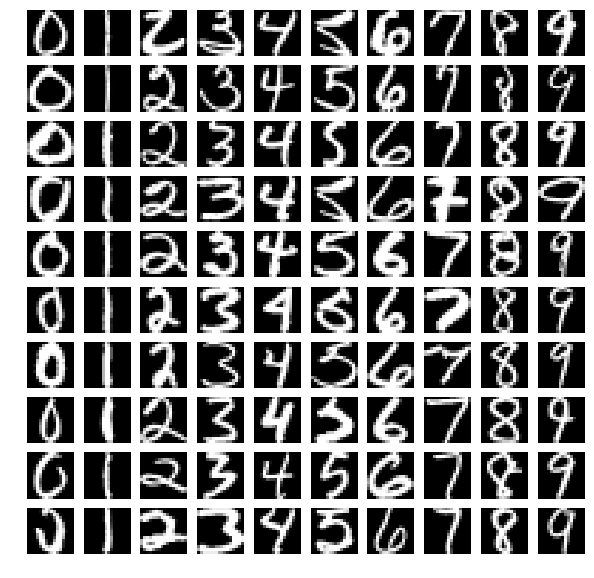

In [4]:
num_samples = 10
num_classes = len(set(y_tr))

classes = set(y_tr)
num_classes = len(classes)
fig, ax = plt.subplots(num_samples, num_classes, sharex = True, sharey = True, figsize=(num_classes, num_samples))

for label in range(num_classes):
    class_idxs = np.where(y_tr == label)
    for i, idx in enumerate(np.random.randint(0, class_idxs[0].shape[0], num_samples)):
        ax[i, label].imshow(X_tr[class_idxs[0][idx]].reshape([16, 16]), 'gray')
        ax[i, label].set_axis_off()

In [6]:
from sklearn.svm import LinearSVC
lsvm = LinearSVC(C = 0.1)
lsvm.fit(X_tr, y_tr)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [7]:
preds = lsvm.predict(X_te)
accuracy = sum((preds == y_te))/len(y_te)
print("Accuracy of Support vector Machine, ", accuracy)

Accuracy of Support vector Machine,  0.916791230692576


9

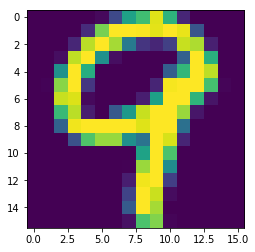

In [33]:

ordinal = 
test = X_te[ordinal]
 imshow(test.reshape(16,16))
lsvm.predict(X_te)[ordinal]

In [38]:
test = X_te[:10]
[lambda x : imshow(x.reshape(16,16)) for x in test]

[<function __main__.<listcomp>.<lambda>(x)>,
 <function __main__.<listcomp>.<lambda>(x)>,
 <function __main__.<listcomp>.<lambda>(x)>,
 <function __main__.<listcomp>.<lambda>(x)>,
 <function __main__.<listcomp>.<lambda>(x)>,
 <function __main__.<listcomp>.<lambda>(x)>,
 <function __main__.<listcomp>.<lambda>(x)>,
 <function __main__.<listcomp>.<lambda>(x)>,
 <function __main__.<listcomp>.<lambda>(x)>,
 <function __main__.<listcomp>.<lambda>(x)>]

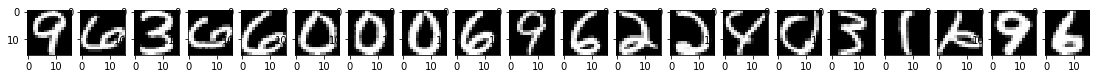

[9 6 3 6 6 0 0 0 6 9 6 2 3 4 0 3 1 4 9 6]


In [80]:
num = 20
f = plt.figure(figsize=(20,8))
for i in range(num):
    f.add_subplot(1, num+1, i+1)
    plt.imshow(X_te[i].reshape(16,16),'gray')
plt.show()
print(lsvm.predict(X_te)[:num])